# Overlap comparisons

In this notebook we investigate the overlap of the VHS and HSC Wide surveys in order to estimate computing times and data storage requirements.

In [1]:
from astropy.table import Table
import astropy.units as u
import json
import glob

In [2]:
hsc_patches = json.loads(open('hsc_total_patch_dict.json', 'r').read())
vhs_patches = json.loads(open('vhs_total_patch_dict.json', 'r').read())

In [3]:
hsc_patches

{'17131': [[2, 7],
  [7, 2],
  [8, 1],
  [7, 0],
  [5, 7],
  [3, 8],
  [8, 3],
  [3, 4],
  [8, 6],
  [3, 7],
  [8, 8],
  [2, 5],
  [7, 6],
  [5, 5],
  [5, 4],
  [6, 1],
  [4, 7],
  [3, 6],
  [4, 5],
  [8, 5],
  [6, 0],
  [8, 0],
  [2, 6],
  [7, 4],
  [8, 7],
  [6, 8],
  [4, 6],
  [4, 8],
  [8, 4],
  [8, 2],
  [6, 7],
  [7, 3],
  [4, 4],
  [5, 3],
  [7, 1],
  [7, 8],
  [6, 3],
  [2, 8],
  [7, 5],
  [7, 7],
  [6, 2],
  [6, 5],
  [5, 8],
  [6, 6],
  [3, 5],
  [5, 6],
  [6, 4]],
 '17272': [[7, 2],
  [5, 2],
  [8, 4],
  [7, 0],
  [8, 2],
  [8, 1],
  [7, 3],
  [7, 1],
  [6, 3],
  [8, 3],
  [6, 0],
  [6, 2],
  [5, 0],
  [6, 1],
  [8, 0],
  [5, 1],
  [7, 4]],
 '8765': [[2, 7],
  [1, 5],
  [0, 6],
  [8, 1],
  [0, 1],
  [3, 8],
  [8, 6],
  [8, 8],
  [2, 4],
  [2, 5],
  [7, 6],
  [4, 3],
  [3, 0],
  [1, 0],
  [1, 7],
  [5, 4],
  [1, 4],
  [4, 7],
  [3, 6],
  [8, 0],
  [7, 4],
  [1, 1],
  [8, 7],
  [1, 3],
  [4, 6],
  [4, 0],
  [8, 4],
  [0, 7],
  [8, 2],
  [7, 3],
  [5, 3],
  [7, 1],
  [0, 3],
  

In [4]:
n=0
for tract in hsc_patches:
    n+=len(hsc_patches[tract])
print("There are {} patches in HSC which is {} square degrees of processing area (including overlap).".format(
    n,
    round(n*((1.7*u.deg/9)**2).value)
))

There are 14926 patches in HSC which is 533.0 square degrees of processing area (including overlap).


In [5]:
n=0
for tract in vhs_patches:
    n+=len(vhs_patches[tract])
print("There are {} patches in VHS which is {} square degrees of processing area (including overlap).".format(
    n,
    round(n*((1.7*u.deg/9)**2).value)
))

There are 670137 patches in VHS which is 23910.0 square degrees of processing area (including overlap).


In [6]:
hsc_vhs_overlap = {}

for tract in hsc_patches:
    
    try:
        hsc_vhs_overlap[tract] = set(["[{},{}]".format(p[0],p[1]) for p in hsc_patches[tract]]).intersection(
            set(["[{},{}]".format(p[0],p[1]) for p in vhs_patches[tract]])
        )
    except KeyError:
        pass
    
for tract in hsc_vhs_overlap:
    hsc_vhs_overlap[tract] = [[int(p[1]),int(p[3])] for p in hsc_vhs_overlap[tract]]

In [7]:
json.dumps(hsc_vhs_overlap, separators=(',', ':'))

'{"8765":[[0,1],[2,7],[2,4],[2,3],[8,2],[7,3],[3,7],[5,1],[2,0],[1,0],[0,6],[1,4],[6,7],[4,8],[6,2],[3,6],[4,2],[2,6],[1,3],[4,6],[5,0],[7,7],[2,5],[7,2],[1,5],[3,5],[5,5],[1,7],[6,1],[5,3],[0,8],[6,0],[6,3],[8,4],[4,3],[0,7],[3,8],[8,1],[5,2],[8,6],[0,5],[1,2],[6,6],[5,6],[3,3],[1,8],[2,8],[1,1],[0,4],[5,7],[5,4],[7,8],[8,8],[4,1],[6,5],[3,2],[4,5],[7,4],[4,7],[8,3],[5,8],[8,5],[3,0],[1,6],[2,2],[8,0],[0,0],[8,7],[4,0],[7,6],[0,2],[6,4],[7,0],[7,1],[0,3],[3,4],[2,1],[6,8],[4,4],[3,1],[7,5]],"9465":[[7,8],[8,3],[5,8],[8,6],[5,7],[8,8],[7,7],[6,7],[4,8],[6,8],[8,5],[8,2],[8,7],[6,6],[7,6],[8,4],[7,5]],"9706":[[3,5],[0,1],[5,5],[3,3],[3,0],[2,4],[2,3],[1,1],[0,4],[1,6],[5,3],[6,1],[2,2],[8,0],[6,0],[0,0],[5,4],[5,1],[6,3],[2,0],[1,0],[4,0],[0,6],[0,2],[1,4],[4,3],[4,1],[6,2],[7,0],[3,6],[4,2],[3,2],[2,6],[1,3],[5,2],[0,3],[4,5],[4,6],[3,4],[2,1],[5,0],[2,5],[4,4],[0,5],[3,1],[1,2],[1,5]],"9572":[],"8525":[[3,5],[8,3],[5,5],[5,8],[5,6],[8,5],[2,8],[1,8],[2,7],[2,4],[8,2],[1,7],[1,6],[5,7]

In [8]:
with open('hsc_vhs_overlap.json', 'w') as outfile:
    json.dump(hsc_vhs_overlap, outfile, separators=(',', ':'))

In [9]:
n=0
for tract in hsc_vhs_overlap:
    n+=len(hsc_vhs_overlap[tract])
print("There are {} patches in VHS and HSC which is {} square degrees of processing area (including overlap).".format(
    n,
    round(n*((1.7*u.deg/9)**2).value)
))

There are 2040 patches in VHS and HSC which is 73.0 square degrees of processing area (including overlap).


# TODO DOWNLOAD ALL HSC FILES - THIS NUMBER IS TOO LOW!!!

For now lets get an upper bound by just taking the tracts defined in the field definition tract lists

In [10]:
wide_tract_files = glob.glob('../dmu0/dmu0_HSC/tracts_patches/*_W*.txt')
wide_tract_files

['../dmu0/dmu0_HSC/tracts_patches/tracts_patches_W-AEGIS.txt',
 '../dmu0/dmu0_HSC/tracts_patches/tracts_patches_W-w06.txt',
 '../dmu0/dmu0_HSC/tracts_patches/tracts_patches_W-w04.txt',
 '../dmu0/dmu0_HSC/tracts_patches/tracts_patches_W-w05.txt',
 '../dmu0/dmu0_HSC/tracts_patches/tracts_patches_W-w01.txt',
 '../dmu0/dmu0_HSC/tracts_patches/tracts_patches_W-w02.txt',
 '../dmu0/dmu0_HSC/tracts_patches/tracts_patches_W-w03.txt']

In [11]:

tracts = set()

for tract_file in wide_tract_files:
    f = open(tract_file, 'r')
    for x in f:
        if x.startswith('Tract'):
            tracts.add(int(x.split(' ')[1])) 
len(tracts)

911

In [12]:
vhs_tracts = set()
for t in vhs_patches:
    vhs_tracts.add(int(t))
len(vhs_tracts)

8743

In [13]:
tract_overlap = vhs_tracts.intersection(tracts)
len(tract_overlap)

333

In [14]:
print("There are {} tracts in VHS and HSC which is {} square degrees of processing area (including overlap).".format(
    len(tract_overlap),
    round(len(tract_overlap)*81*((1.7*u.deg/9)**2).value)
))

There are 333 tracts in VHS and HSC which is 962.0 square degrees of processing area (including overlap).


In [15]:
333 * (1.7**2)


962.3699999999999

In [16]:
tracts

{8278,
 8279,
 8280,
 8281,
 8282,
 8283,
 8284,
 8285,
 8286,
 8519,
 8520,
 8521,
 8522,
 8523,
 8524,
 8525,
 8526,
 8527,
 8761,
 8762,
 8763,
 8764,
 8765,
 8766,
 8767,
 8768,
 8769,
 8855,
 8856,
 8857,
 8858,
 8859,
 8860,
 8861,
 8862,
 8863,
 8864,
 8865,
 8866,
 8867,
 8868,
 8869,
 8870,
 8871,
 8872,
 8873,
 8874,
 8875,
 8876,
 8877,
 8878,
 8879,
 8880,
 8881,
 8882,
 8883,
 8884,
 8885,
 8886,
 8887,
 8984,
 8985,
 8986,
 8987,
 8988,
 8989,
 8990,
 8991,
 8992,
 8994,
 8995,
 8996,
 8997,
 8998,
 8999,
 9000,
 9003,
 9004,
 9005,
 9006,
 9007,
 9008,
 9009,
 9010,
 9011,
 9069,
 9070,
 9071,
 9072,
 9073,
 9074,
 9075,
 9076,
 9077,
 9078,
 9079,
 9080,
 9081,
 9082,
 9083,
 9084,
 9085,
 9086,
 9087,
 9088,
 9089,
 9090,
 9091,
 9092,
 9093,
 9095,
 9096,
 9097,
 9098,
 9099,
 9100,
 9101,
 9102,
 9103,
 9104,
 9105,
 9106,
 9107,
 9108,
 9109,
 9110,
 9111,
 9112,
 9113,
 9114,
 9115,
 9116,
 9117,
 9118,
 9119,
 9120,
 9121,
 9122,
 9123,
 9124,
 9125,
 9126,
 9127,

In [17]:
t_str = ''
for t in tracts:
    t_str += ',{}'.format(t)
t_str

',10909,10910,10281,10282,10283,10284,10285,10286,10287,10288,10289,10290,10291,10292,10293,10294,10295,10296,10297,10298,10911,10299,10300,10301,10302,10303,10304,10308,10309,10310,10311,10312,10313,10314,10315,10316,10317,10318,10319,10320,10321,10322,10323,10324,10325,10326,10327,10328,10329,10330,10331,10332,10333,10334,10335,10336,10337,10338,10339,10340,10341,10342,10343,10344,10345,10346,10347,10348,10349,10913,10914,10915,10417,10418,10419,10420,10421,10422,10423,10424,10425,10426,10427,10428,10429,10430,10431,10432,10433,10434,10435,10436,10437,10438,10439,10440,10441,10442,10443,10444,9494,9819,9820,8519,8520,8521,8522,8523,8524,8525,8526,8527,9842,9495,9843,9844,9845,9846,9847,9848,9849,9850,9851,9852,10658,10659,10660,9853,10661,10662,10663,10664,9854,10665,10666,10667,10668,9855,10669,10670,10671,10672,10673,16821,16822,9856,10674,10675,9857,10676,10677,10678,10679,9858,10680,10681,10682,10683,9859,10912,8761,8762,8763,8764,8765,8766,8767,8768,8769,16972,16973,9481,9482,94

In [19]:
import numpy as np


import matplotlib
import matplotlib.gridspec as gridspec 
import matplotlib.pyplot as plt
x =  np.linspace(-10,10,100)

In [20]:
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [21]:
y = np.exp(-x**2)

In [22]:
y

array([3.72007598e-44, 2.03026390e-42, 1.02118442e-40, 4.73376699e-39,
       2.02236984e-37, 7.96279046e-36, 2.88948872e-34, 9.66335032e-33,
       2.97841666e-31, 8.46046409e-30, 2.21489900e-28, 5.34397817e-27,
       1.18830091e-25, 2.43522554e-24, 4.59941880e-23, 8.00603952e-22,
       1.28435035e-20, 1.89889213e-19, 2.58742690e-18, 3.24927813e-17,
       3.76059612e-16, 4.01122945e-15, 3.94320471e-14, 3.57249927e-13,
       2.98295005e-12, 2.29546576e-11, 1.62797100e-10, 1.06407812e-09,
       6.40990174e-09, 3.55860870e-08, 1.82079103e-07, 8.58600196e-07,
       3.73140910e-06, 1.49453385e-05, 5.51683065e-05, 1.87682835e-04,
       5.88451217e-04, 1.70038545e-03, 4.52830117e-03, 1.11140983e-02,
       2.51399360e-02, 5.24089078e-02, 1.00692485e-01, 1.78295348e-01,
       2.90960459e-01, 4.37601640e-01, 6.06561603e-01, 7.74857597e-01,
       9.12262625e-01, 9.89848834e-01, 9.89848834e-01, 9.12262625e-01,
       7.74857597e-01, 6.06561603e-01, 4.37601640e-01, 2.90960459e-01,
      

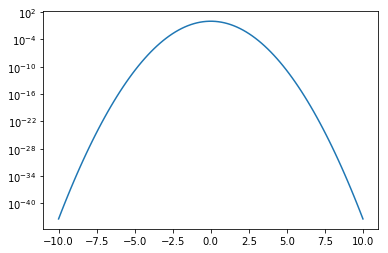

In [24]:
plt.plot(x,y)
plt.yscale('log')